In [7]:
%pip install matplotlib

import json
from collections import Counter
import matplotlib.pyplot as plt

  Using cached matplotlib-3.9.1.post1-cp311-cp311-win_amd64.whl (8.0 MB)
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl (188 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
f = open('memes40001-50000.json', encoding="utf8")

memes = json.load(f)

print(len(memes))

confirmed = [meme for meme in memes if meme['Status'] == 'Confirmed']
print(len(confirmed))

3854
248


In [23]:
# Use one single label for X / Twitter
for meme in memes:
    if meme['Origin'] in ['Twitter / X', 'Twitter', 'X']:
        meme['Origin'] = 'X / Twitter'

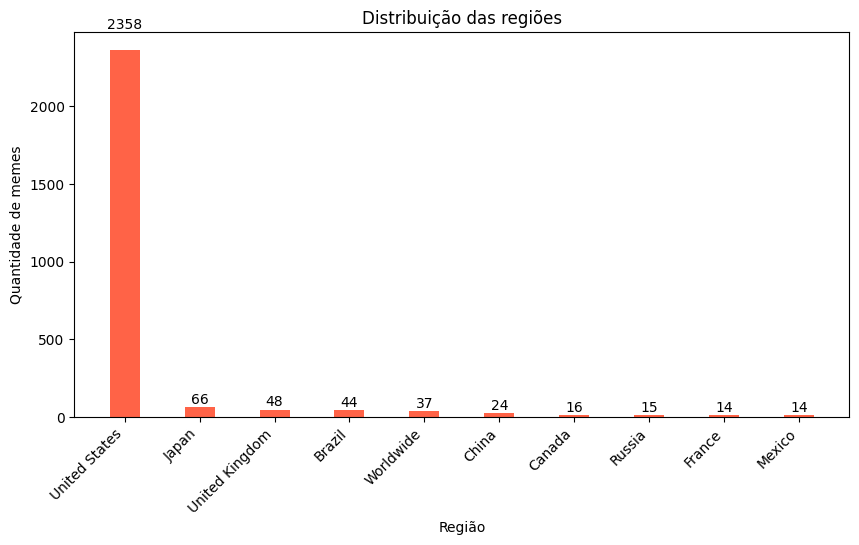

In [18]:
regions_list = [meme['Region'] for meme in memes if 'Region' in meme.keys()]
regions_distribution = dict(Counter(regions_list))

top10 = sorted(regions_distribution, key=lambda region:regions_distribution[region], reverse=True)[:10]

regions = list(top10)
number_of_occurrencies = list([regions_distribution[region] for region in top10])

fig = plt.figure(figsize=(10, 5))

rects = plt.bar(regions, number_of_occurrencies, color='tomato',
                width=0.4)

plt.xlabel("Região")
plt.ylabel("Quantidade de memes")
plt.title("Distribuição das regiões")
plt.xticks(rotation=45, ha='right')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                 '%d' % int(height),
                 ha='center', va='bottom')


autolabel(rects)

plt.show()

                                              0.0/300.2 kB ? eta -:--:--
     ----------------------                 174.1/300.2 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\wordcloud_cli.exe' -> 'c:\\Python311\\Scripts\\wordcloud_cli.exe.deleteme'



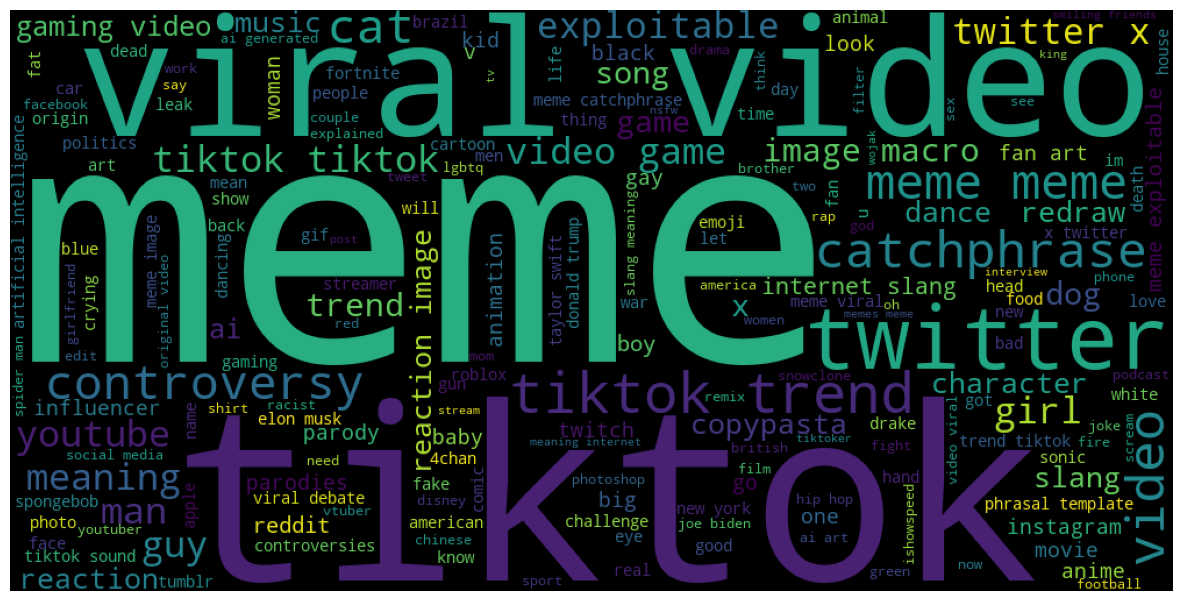

In [19]:
%pip install wordcloud
from wordcloud import WordCloud

all_tags = []
for meme in memes:
    all_tags += meme['tags']

tags = ' '.join(all_tags)

wordcloud = WordCloud(width = 1000, height = 500).generate(tags)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

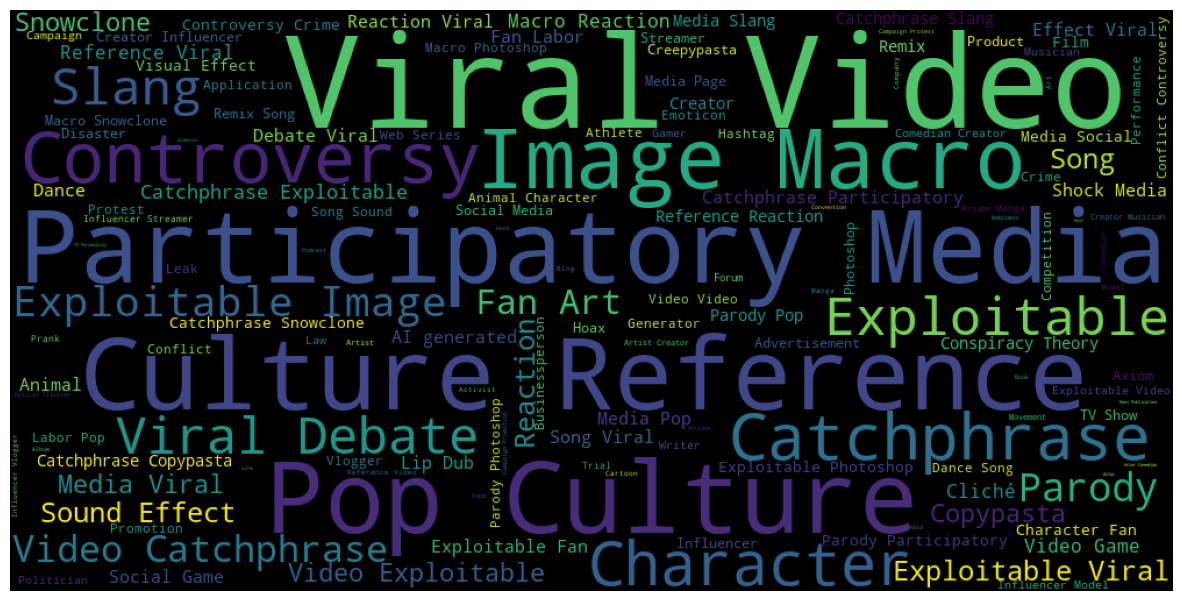

In [46]:
all_types = [meme['Type:'] for meme in memes if 'Type:' in meme.keys()]

types = ' '.join(all_types)

wordcloud = WordCloud(width = 1000, height = 500).generate(types)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

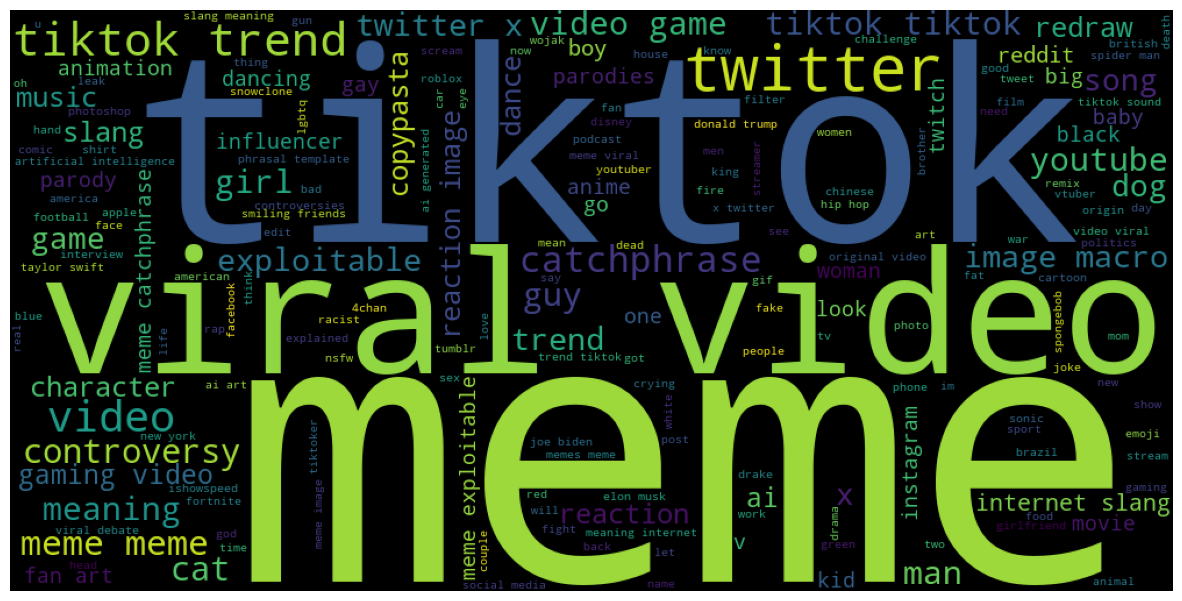

In [21]:
br_tags = []
for meme in [meme for meme in memes if 'Region' in meme.keys() and meme['Region'] == 'Brazil']:
    br_tags += meme['tags']

tags = ' '.join(all_tags)

wordcloud = WordCloud(width = 1000, height = 500).generate(tags)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

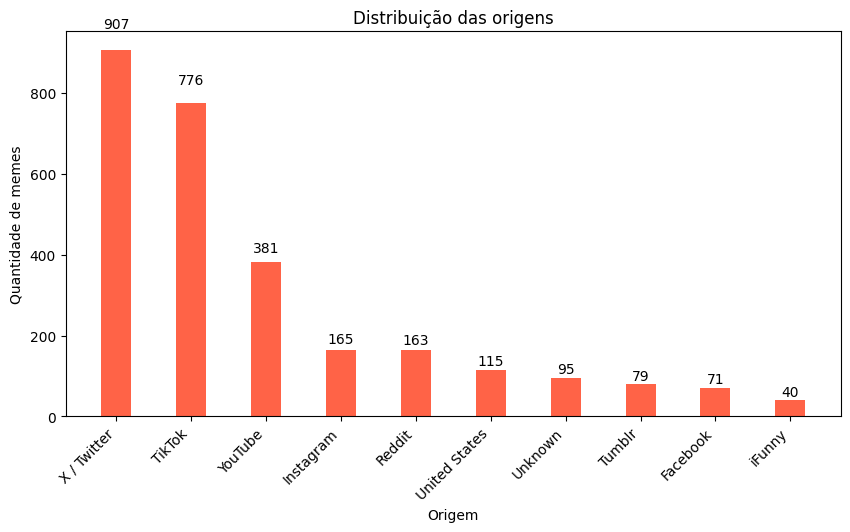

In [24]:
origins_list = [meme['Origin'] for meme in memes if 'Origin' in meme.keys()]
origins_distribution = dict(Counter(origins_list))

top10 = sorted(origins_distribution, key=lambda origin:origins_distribution[origin], reverse=True)[:10]

origins = list(top10)
number_of_occurrencies = list([origins_distribution[origin] for origin in top10])

fig = plt.figure(figsize=(10, 5))

rects = plt.bar(origins, number_of_occurrencies, color='tomato',
                width=0.4)

plt.xlabel("Origem")
plt.ylabel("Quantidade de memes")
plt.title("Distribuição das origens")
plt.xticks(rotation=45, ha='right')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                 '%d' % int(height),
                 ha='center', va='bottom')


autolabel(rects)

plt.show()

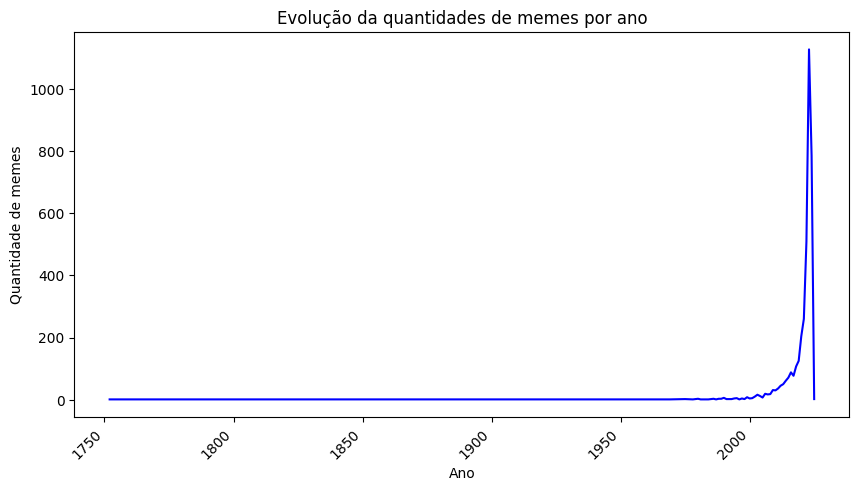

In [39]:
years_list = [meme['Year'] for meme in memes]
years_distribution = dict(Counter(years_list))

years = sorted([int(key) for key in list(years_distribution.keys()) if key != 'Unknown'])
number_of_occurrencies = [years_distribution[f"{year}"] for year in years]

fig = plt.figure(figsize=(10, 5))

rects = plt.plot(years, number_of_occurrencies, color='blue')

plt.xlabel("Ano")
plt.ylabel("Quantidade de memes")
plt.title("Evolução da quantidades de memes por ano")
plt.xticks(rotation=45, ha='right')


# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                  '%d' % int(height),
#                  ha='center', va='bottom')


# autolabel(rects)

plt.show()

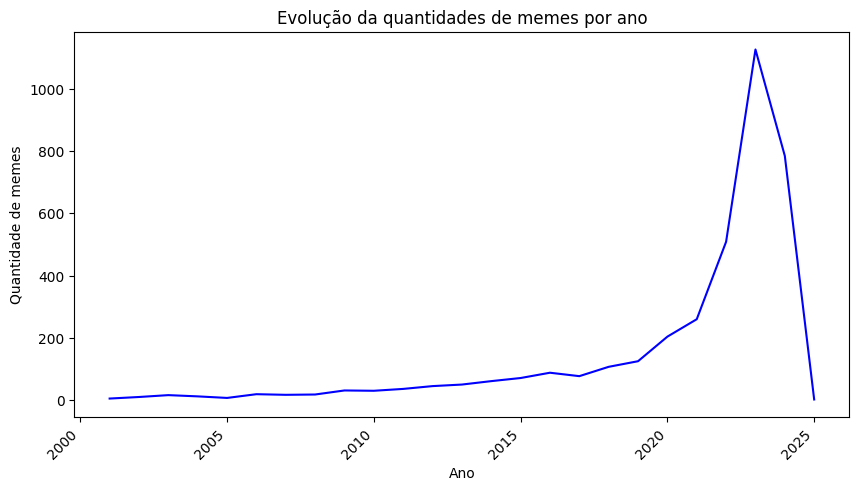

In [40]:
years_list = [meme['Year'] for meme in memes]
years_distribution = dict(Counter(years_list))

years = sorted([int(key) for key in list(years_distribution.keys()) if key != 'Unknown' and int(key) > 2000])
number_of_occurrencies = [years_distribution[f"{year}"] for year in years]

fig = plt.figure(figsize=(10, 5))

rects = plt.plot(years, number_of_occurrencies, color='blue')

plt.xlabel("Ano")
plt.ylabel("Quantidade de memes")
plt.title("Evolução da quantidades de memes por ano")
plt.xticks(rotation=45, ha='right')


# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                  '%d' % int(height),
#                  ha='center', va='bottom')


# autolabel(rects)

plt.show()

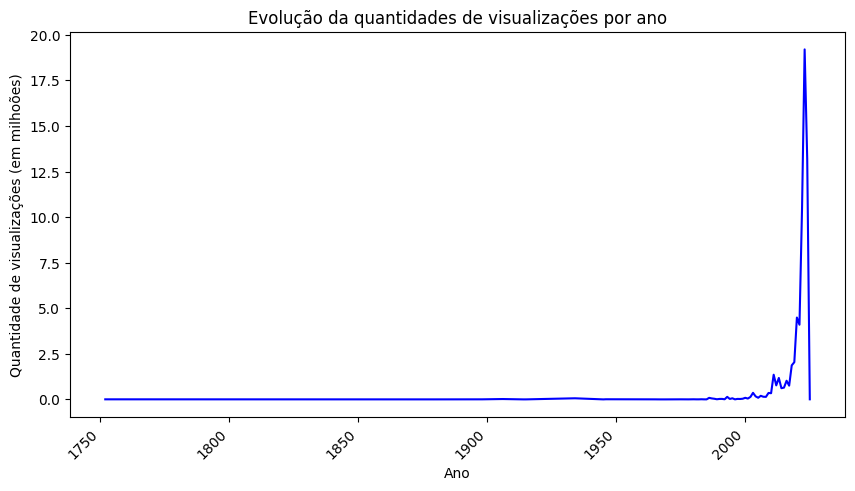

In [43]:
years_list = [meme['Year'] for meme in memes if meme['Year'] != 'Unknown']
years_views_distribution = dict({})
for year in years_list:
    years_views_distribution[year] = sum([meme['views'] for meme in memes if meme['Year'] == year]) / 1000000

years = sorted([int(key) for key in list(years_views_distribution.keys()) if key != 'Unknown'])
number_of_occurrencies = [years_views_distribution[f"{year}"] for year in years]

fig = plt.figure(figsize=(10, 5))

rects = plt.plot(years, number_of_occurrencies, color='blue')

plt.xlabel("Ano")
plt.ylabel("Quantidade de visualizações (em milhoões)")
plt.title("Evolução da quantidades de visualizações por ano")
plt.xticks(rotation=45, ha='right')


# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                  '%d' % int(height),
#                  ha='center', va='bottom')


# autolabel(rects)

plt.show()

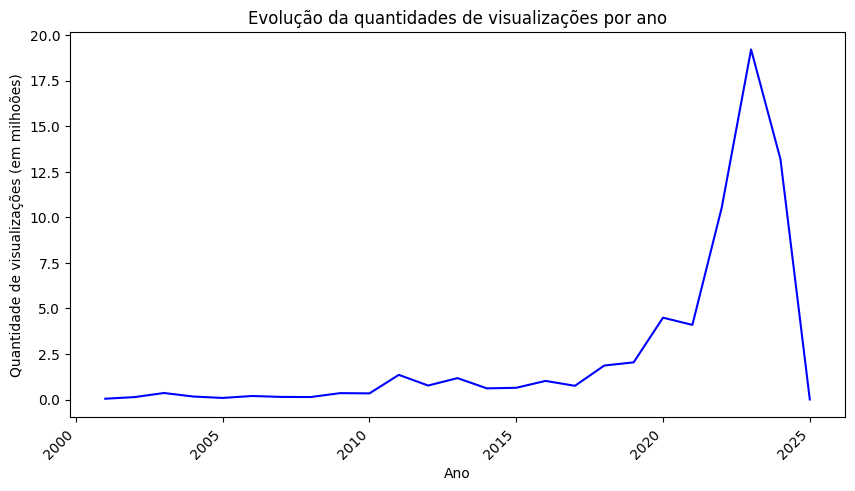

In [44]:
years_list = [meme['Year'] for meme in memes if meme['Year'] != 'Unknown']
years_views_distribution = dict({})
for year in years_list:
    years_views_distribution[year] = sum([meme['views'] for meme in memes if meme['Year'] == year]) / 1000000

years = sorted([int(key) for key in list(years_views_distribution.keys()) if int(key) > 2000])
number_of_occurrencies = [years_views_distribution[f"{year}"] for year in years]

fig = plt.figure(figsize=(10, 5))

rects = plt.plot(years, number_of_occurrencies, color='blue')

plt.xlabel("Ano")
plt.ylabel("Quantidade de visualizações (em milhoões)")
plt.title("Evolução da quantidades de visualizações por ano")
plt.xticks(rotation=45, ha='right')


# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                  '%d' % int(height),
#                  ha='center', va='bottom')


# autolabel(rects)

plt.show()